In [195]:
#Import the necessary libraries

In [196]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
from sklearn.naive_bayes import GaussianNB

In [197]:
#Read from dataframe

In [198]:
banking = pd.read_csv("Bank_Personal_Loan_Modelling.csv")
banking.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [199]:
banking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [200]:
banking.shape
banking['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

In [201]:
banking.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [202]:
#Univariate Analysis using Histogram and Multivariate analysis using PairPlot

In [203]:
banking.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [204]:
#dropping/ignoring ID 
banking = banking.drop('ID', axis=1)
banking = banking.drop('ZIP Code', axis=1)
# Also replacing the categorical var Education with actual values
banking['Education'] = banking['Education'].replace({1: 'Undergrad', 2: 'Graduate', 3: ' Advanced/Professional'})
banking.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,Undergrad,0,0,1,0,0,0
1,45,19,34,3,1.5,Undergrad,0,0,1,0,0,0
2,39,15,11,1,1.0,Undergrad,0,0,0,0,0,0
3,35,9,100,1,2.7,Graduate,0,0,0,0,0,0
4,35,8,45,4,1.0,Graduate,0,0,0,0,0,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a378f2cd0>,
      dtype=object)

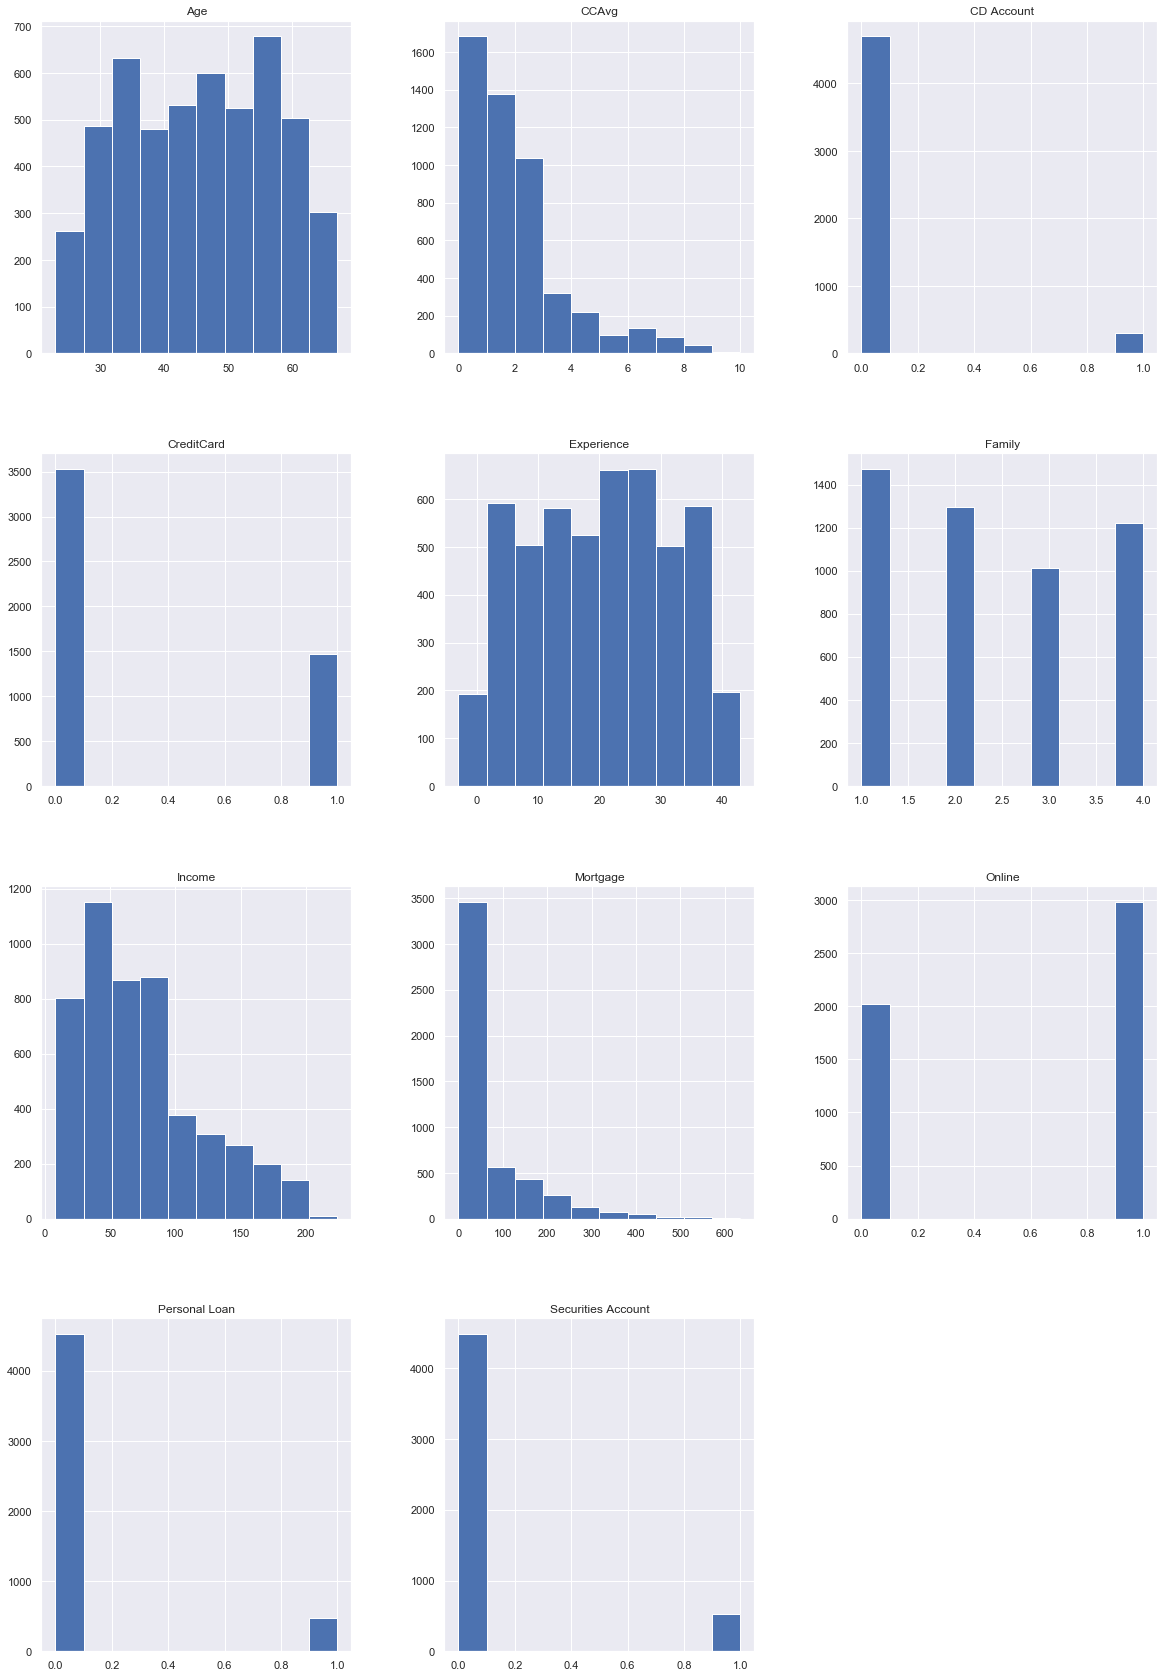

In [205]:
banking.hist(figsize=(20,30))

#Pair Plot to do Multivariate analysis

sns.pairplot(banking)

In [206]:
#Check Missing Values

In [207]:
banking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null object
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(10), object(1)
memory usage: 468.9+ KB


In [208]:
#This shows all data elements are having proper data types

In [209]:
banking.describe(include="all")

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
unique,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,Undergrad,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,2096,NaN,NaN,NaN,NaN,NaN,NaN
mean,45.338400,20.104600,73.774200,2.396400,1.937938,NaN,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,11.467954,46.033729,1.147663,1.747659,NaN,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,-3.000000,8.000000,1.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,1.000000,0.700000,NaN,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,2.000000,1.500000,NaN,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,3.000000,2.500000,NaN,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000


In [210]:
banking.isnull() 

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,False,False,False,False,False,False,False,False,False,False,False,False
4996,False,False,False,False,False,False,False,False,False,False,False,False
4997,False,False,False,False,False,False,False,False,False,False,False,False
4998,False,False,False,False,False,False,False,False,False,False,False,False


In [211]:
#Hence there are no missing values

In [212]:
#Check Outliers

In [213]:
#Check sample 20 values
banking.head(20)

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,Undergrad,0,0,1,0,0,0
1,45,19,34,3,1.5,Undergrad,0,0,1,0,0,0
2,39,15,11,1,1.0,Undergrad,0,0,0,0,0,0
3,35,9,100,1,2.7,Graduate,0,0,0,0,0,0
4,35,8,45,4,1.0,Graduate,0,0,0,0,0,1
5,37,13,29,4,0.4,Graduate,155,0,0,0,1,0
6,53,27,72,2,1.5,Graduate,0,0,0,0,1,0
7,50,24,22,1,0.3,Advanced/Professional,0,0,0,0,0,1
8,35,10,81,3,0.6,Graduate,104,0,0,0,1,0
9,34,9,180,1,8.9,Advanced/Professional,0,1,0,0,0,0


In [214]:
#Check outliers for Age

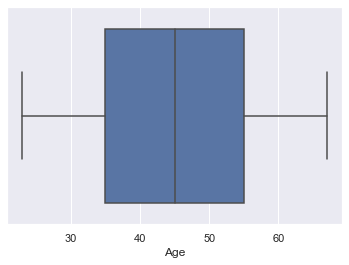

In [215]:
sns.boxplot(banking["Age"])

In [216]:
#There are no outliers, age range is between 35 and 55

In [217]:
#Check outliers for Experience

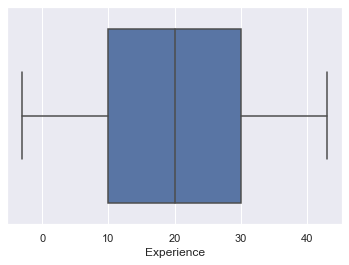

In [218]:
sns.boxplot(banking["Experience"])

In [219]:
#Experience is between 10 and 30 years

In [220]:
#Check outliers for Income

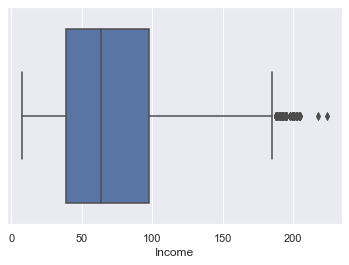

In [221]:
sns.boxplot(banking["Income"])

In [222]:
#We can see for Income there are outliers where for some people income is greater than 170000$ whereas the range is 40 to 100 K $

In [223]:
#Check outliers for Family

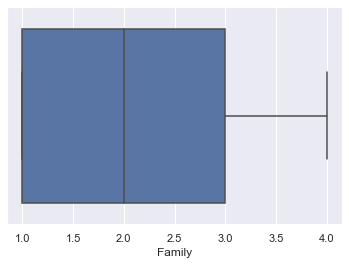

In [224]:
sns.boxplot(banking["Family"])

In [225]:
#There are no outliers

In [226]:
#Check outliers for CCAvg

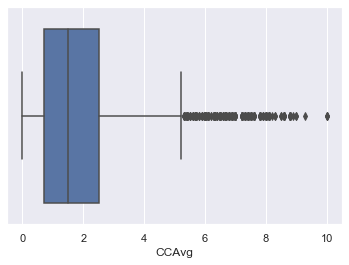

In [227]:
sns.boxplot(banking["CCAvg"])

In [228]:
#We can see there are lots of outliers

In [229]:
#Outliers for Mortgage

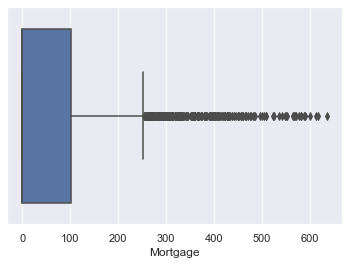

In [230]:
sns.boxplot(banking["Mortgage"])

In [231]:
#Above graph shows the outliers for mortgage

In [232]:
#Check for noises

In [233]:
#bringing the data for banking to visualize

In [234]:
banking.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,Undergrad,0,0,1,0,0,0
1,45,19,34,3,1.5,Undergrad,0,0,1,0,0,0
2,39,15,11,1,1.0,Undergrad,0,0,0,0,0,0
3,35,9,100,1,2.7,Graduate,0,0,0,0,0,0
4,35,8,45,4,1.0,Graduate,0,0,0,0,0,1


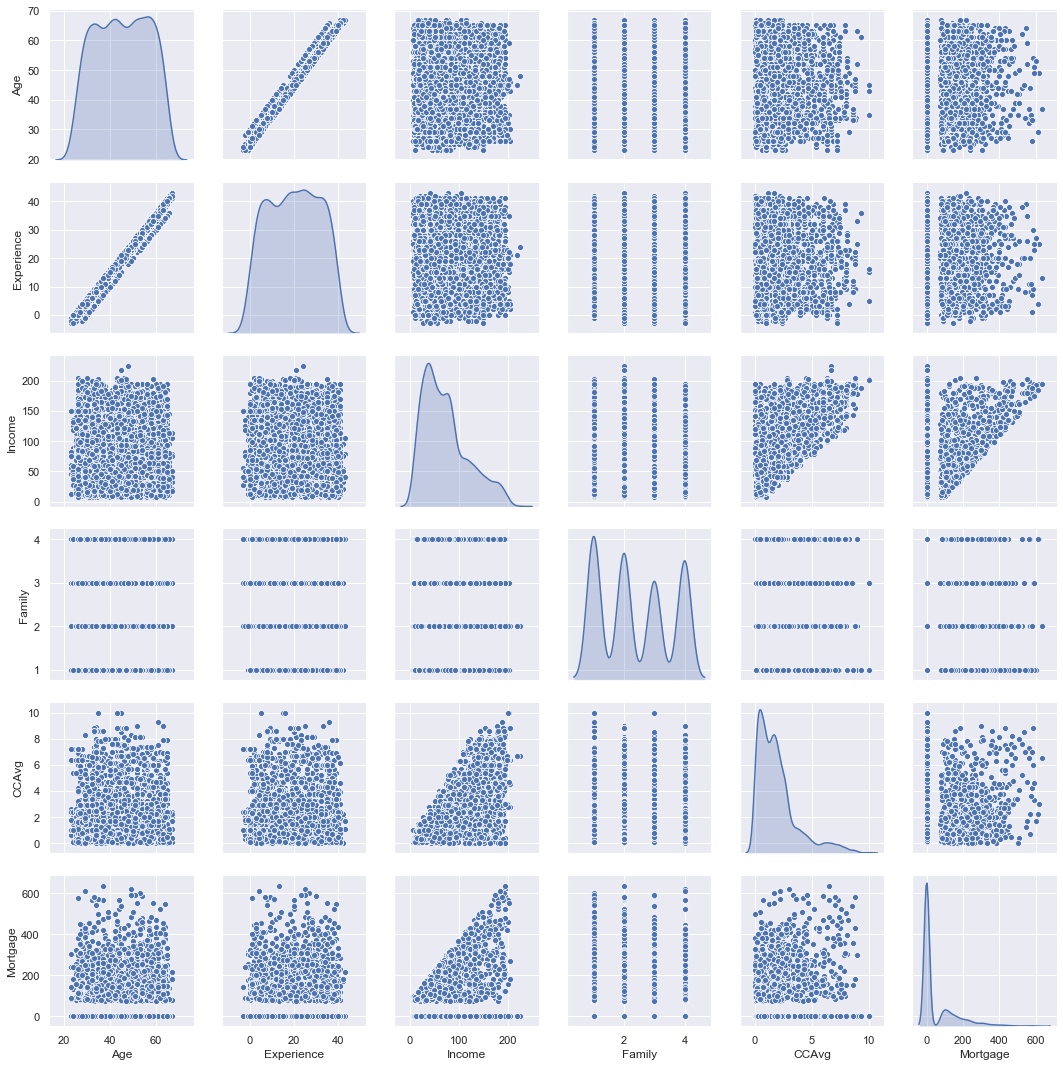

In [235]:
cData_attr = banking.iloc[:, 0:7]
sns.pairplot(cData_attr, diag_kind='kde')

In [236]:
#For categorical data

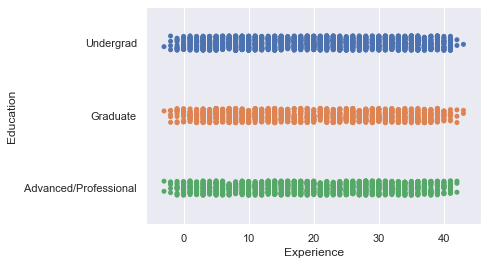

In [237]:
sns.stripplot(banking['Experience'], banking['Education'])

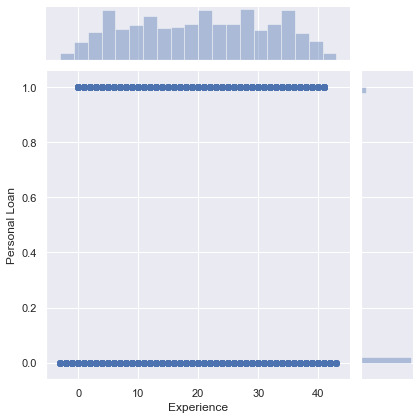

In [238]:
sns.jointplot(banking['Experience'], banking['Personal Loan'])

In [239]:
#The target column is Personal Load, the distribution is shown using Pair Plot

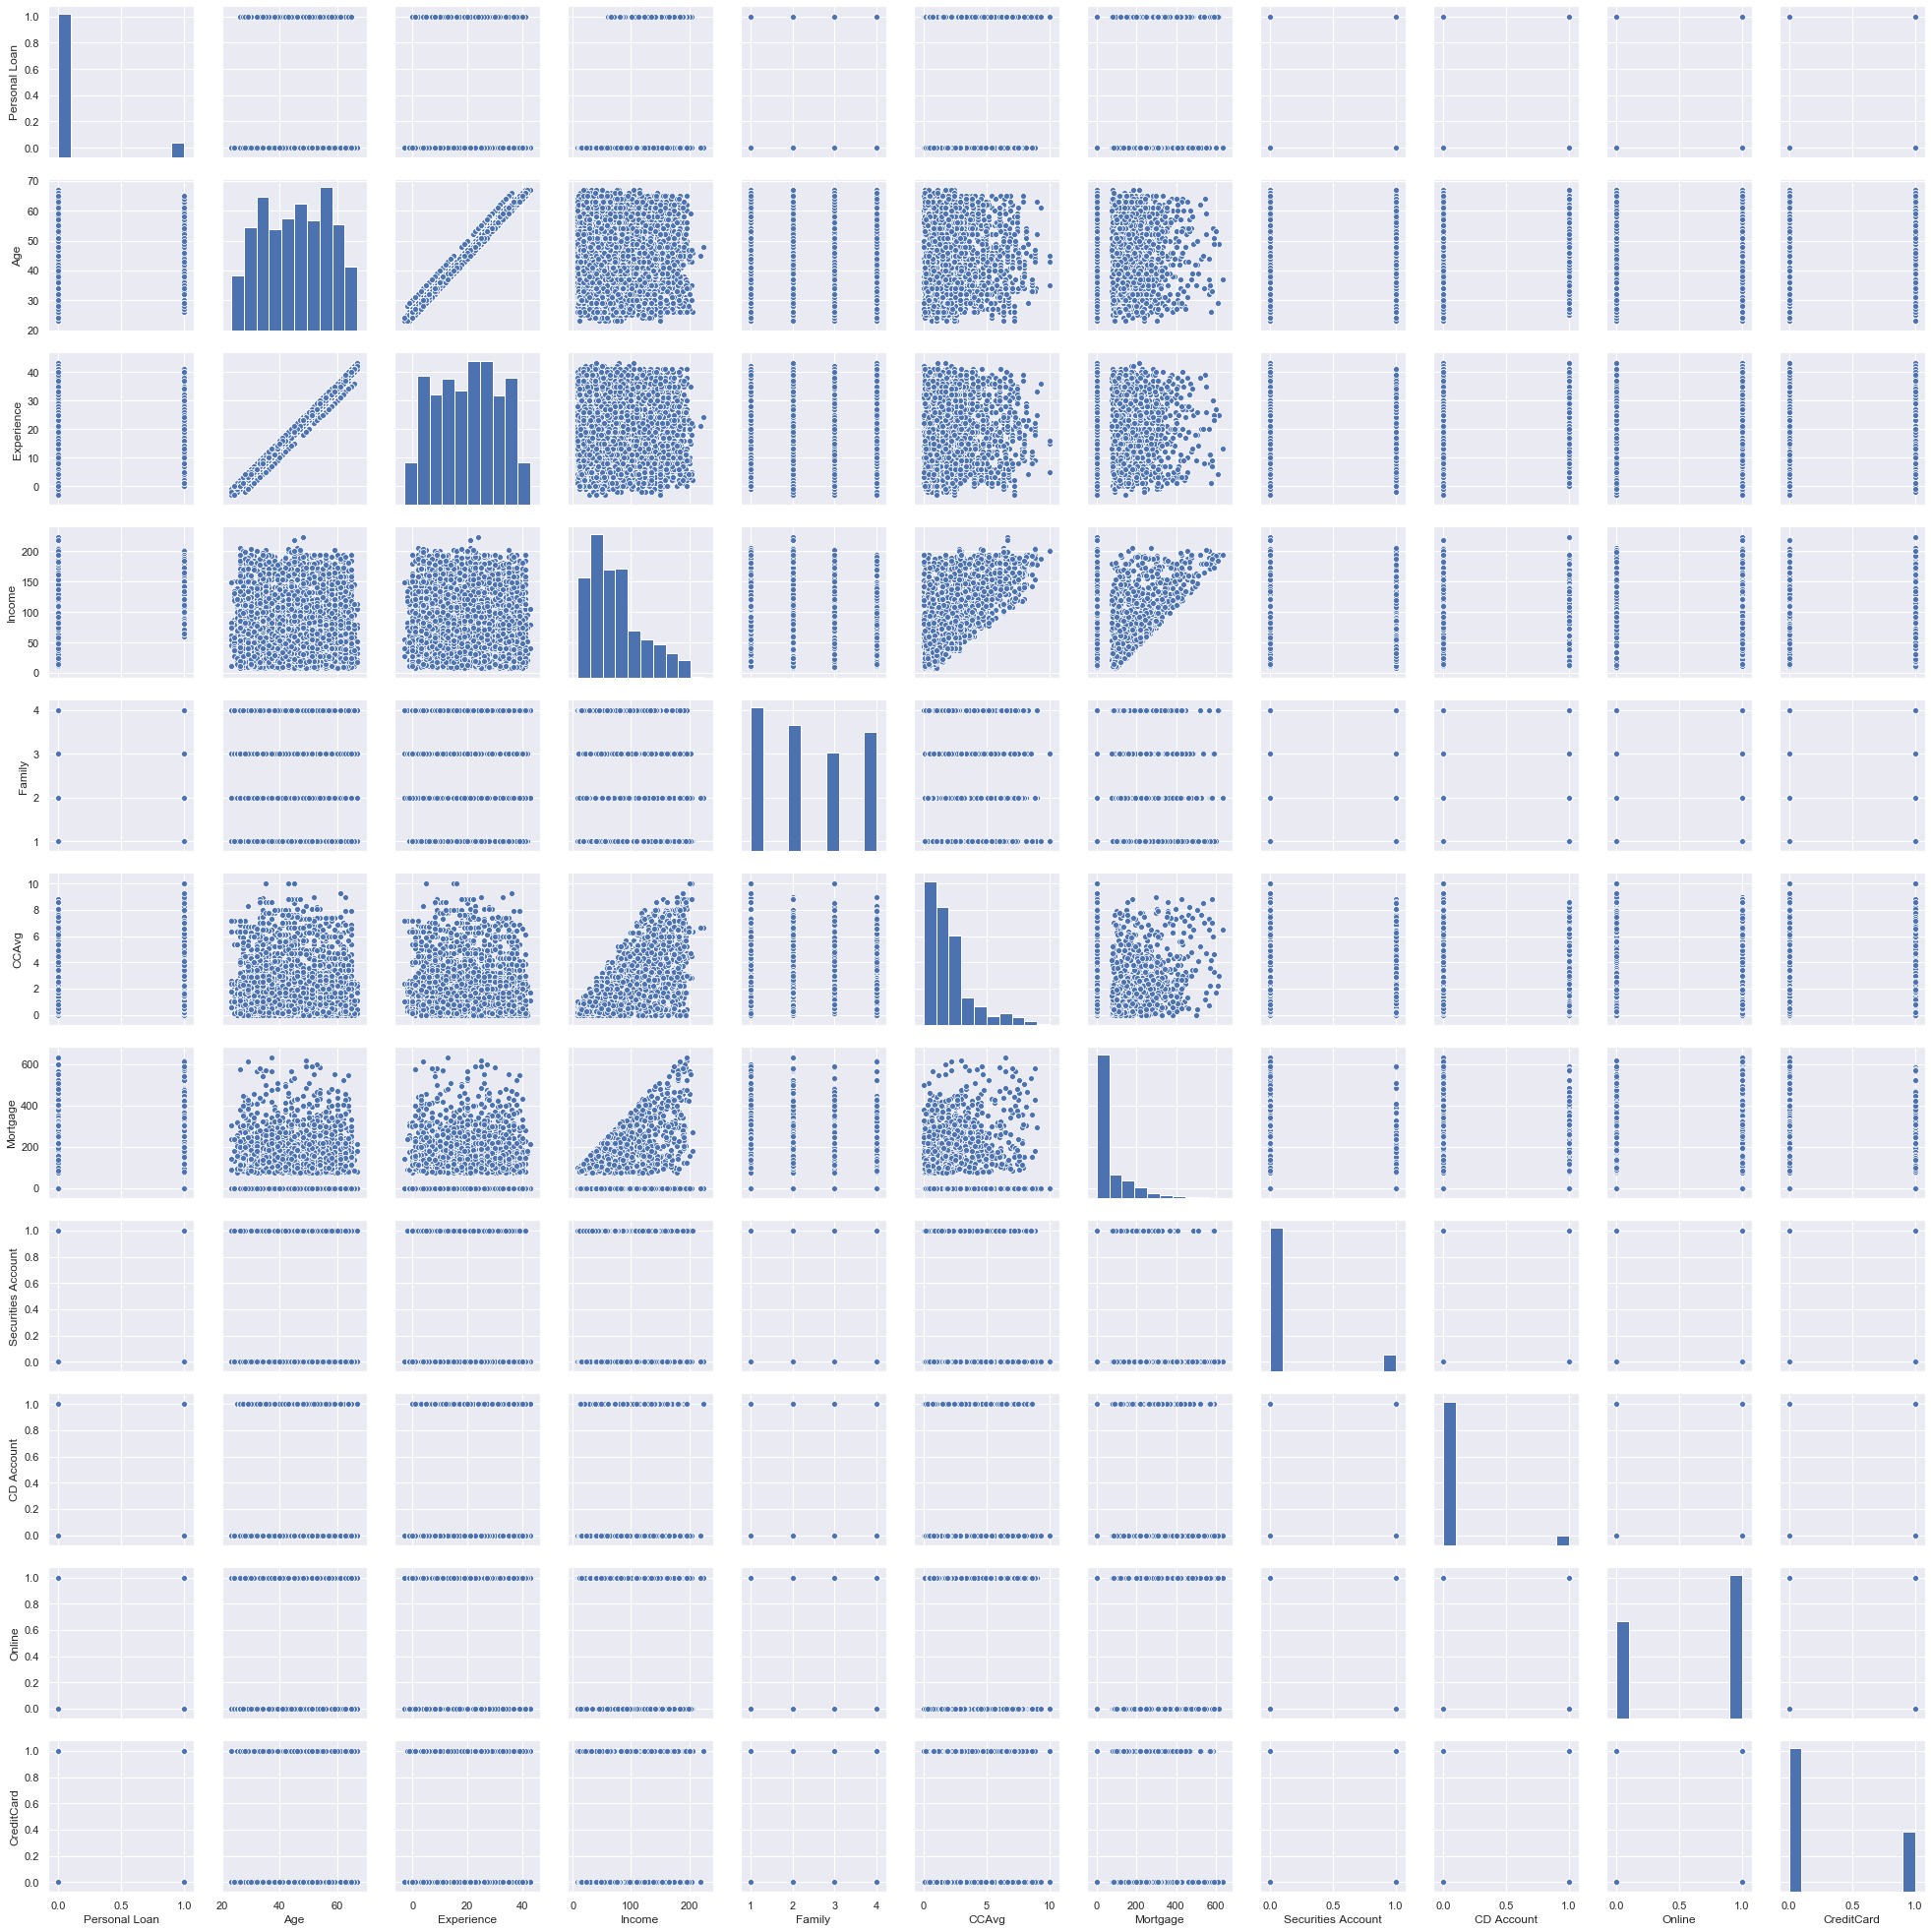

In [240]:
sns.pairplot(banking[['Personal Loan', 'Age', 'Experience', 'Income','Family','CCAvg','Education','Mortgage','Securities Account','CD Account','Online','CreditCard']])

In [241]:
#Split the data into training and test set in the ratio of 70:30 respectively (5 marks)

In [242]:
#Add dummy variables for the categorical variable 

In [243]:
banking = pd.get_dummies(banking, columns=['Education'])
banking.head()

,Age,Experience,Income,Family,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Education_ Advanced/Professional,Education_Graduate,Education_Undergrad
0,25,1,49,4,1.6,0,0,1,0,0,0,0,0,1
1,45,19,34,3,1.5,0,0,1,0,0,0,0,0,1
2,39,15,11,1,1.0,0,0,0,0,0,0,0,0,1
3,35,9,100,1,2.7,0,0,0,0,0,0,0,1,0
4,35,8,45,4,1.0,0,0,0,0,0,1,0,1,0


In [244]:
#check null Start of Logistic Regression Model

In [245]:
banking.isnull().values.any()

False

In [246]:
#check correlation

In [247]:
banking.corr()

,Age,Experience,Income,Family,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Education_ Advanced/Professional,Education_Graduate,Education_Undergrad
Age,1.000000,0.994215,-0.055269,-0.046418,-0.052012,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681,0.045838,-0.016264,-0.027770
Experience,0.994215,1.000000,-0.046574,-0.052563,-0.050077,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967,0.020967,-0.018197,-0.002907
Income,-0.055269,-0.046574,1.000000,-0.157501,0.645984,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385,-0.108878,-0.128364,0.218019
Family,-0.046418,-0.052563,-0.157501,1.000000,-0.109275,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588,-0.008744,0.139201,-0.118628
CCAvg,-0.052012,-0.050077,0.645984,-0.109275,1.000000,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689,-0.080413,-0.090366,0.156979
Mortgage,-0.012539,-0.010582,0.206806,-0.020445,0.109905,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231,-0.014942,-0.031806,0.042841
Personal Loan,-0.007726,-0.007413,0.502462,0.061367,0.366889,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802,0.090212,0.071491,-0.148894
Securities Account,-0.000436,-0.001232,-0.002616,0.019994,0.015086,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028,-0.012421,0.005134,0.006863
CD Account,0.008043,0.010353,0.169738,0.014110,0.136534,0.089311,0.316355,0.317034,1.000000,0.175880,0.278644,0.009780,0.006089,-0.014630
Online,0.013702,0.013898,0.014206,0.010354,-0.003611,-0.005995,0.006278,0.012627,0.175880,1.000000,0.004210,-0.023837,0.020590,0.003394


In [248]:
#Check how many people have take personal loans

In [249]:
n_true = len(banking.loc[banking['Personal Loan'] == True])
n_false = len(banking.loc[banking['Personal Loan'] == False])

In [250]:
print("Number of cases where personal load has been taken: {0} ({1:2.2f}%)".format(n_true, (n_true / (n_true + n_false)) * 100 ))

Number of cases where personal load has been taken: 480 (9.60%)


In [251]:
print("Number of where personal load has not been taken: {0} ({1:2.2f}%)".format(n_false, (n_false / (n_true + n_false)) * 100))

Number of where personal load has not been taken: 4520 (90.40%)


In [252]:
#9.60% of the people in the current dataset have taken personal loans

In [253]:
#Split the data
banking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
Age                                 5000 non-null int64
Experience                          5000 non-null int64
Income                              5000 non-null int64
Family                              5000 non-null int64
CCAvg                               5000 non-null float64
Mortgage                            5000 non-null int64
Personal Loan                       5000 non-null int64
Securities Account                  5000 non-null int64
CD Account                          5000 non-null int64
Online                              5000 non-null int64
CreditCard                          5000 non-null int64
Education_ Advanced/Professional    5000 non-null uint8
Education_Graduate                  5000 non-null uint8
Education_Undergrad                 5000 non-null uint8
dtypes: float64(1), int64(10), uint8(3)
memory usage: 444.5 KB


In [254]:
X = banking.drop('Personal Loan',axis=1)     # Predictor feature columns (8 X m)
Y = banking['Personal Loan']   # Predicted class (1=True, 0=False) (1 X m)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
# 1 is just any random seed number

x_train.head()

,Age,Experience,Income,Family,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,Education_ Advanced/Professional,Education_Graduate,Education_Undergrad
1334,47,22,35,2,1.3,0,0,0,1,0,0,0,1
4768,38,14,39,1,2.0,0,0,0,1,0,0,1,0
65,59,35,131,1,3.8,0,0,0,1,1,0,0,1
177,29,3,65,4,1.8,244,0,0,0,0,0,1,0
4489,39,13,21,3,0.2,0,0,0,1,0,0,1,0


In [255]:
#Calculate dats split

In [256]:
print("{0:0.2f}% data is in training set".format((len(x_train)/len(banking.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test)/len(banking.index)) * 100))

70.00% data is in training set
30.00% data is in test set


In [257]:
print("Original Personal Loan True Values    : {0} ({1:0.2f}%)".format(len(banking.loc[banking['Personal Loan'] == 1]), (len(banking.loc[banking['Personal Loan'] == 1])/len(banking.index)) * 100))
print("Original Personal Loan Values   : {0} ({1:0.2f}%)".format(len(banking.loc[banking['Personal Loan'] == 0]), (len(banking.loc[banking['Personal Loan'] == 0])/len(banking.index)) * 100))
print("")
print("Training Personal Loan True Values    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training Personal Loan False Values   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Test Personal Loan True Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test Personal Loan False Values       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")

Original Personal Loan True Values    : 480 (9.60%)
Original Personal Loan Values   : 4520 (90.40%)

Training Personal Loan True Values    : 331 (9.46%)
Training Personal Loan False Values   : 3169 (90.54%)

Test Personal Loan True Values        : 149 (9.93%)
Test Personal Loan False Values       : 1351 (90.07%)



In [258]:
x_train.head()

,Age,Experience,Income,Family,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,Education_ Advanced/Professional,Education_Graduate,Education_Undergrad
1334,47,22,35,2,1.3,0,0,0,1,0,0,0,1
4768,38,14,39,1,2.0,0,0,0,1,0,0,1,0
65,59,35,131,1,3.8,0,0,0,1,1,0,0,1
177,29,3,65,4,1.8,244,0,0,0,0,0,1,0
4489,39,13,21,3,0.2,0,0,0,1,0,0,1,0


In [259]:
# Fit the model on train
model = LogisticRegression(solver="liblinear")
model.fit(x_train, y_train)
#predict on test
y_predict = model.predict(x_test)

#predict on test
y_prob = model.predict_proba(x_test)

In [260]:
model_score = model.score(x_test, y_test)
print(model_score)

0.9573333333333334


In [261]:
#95.7% of the time the model is correct in predicting

In [262]:
#HeatMap Confusion Matrix

[[  94   55]
 [   9 1342]]


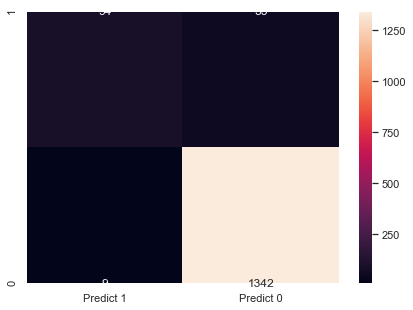

In [263]:
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])
df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g')
print(cm)

In [264]:
# 94 times the model predicted correctly that person is going to take loan

In [265]:
# 1342 times the model predicted correctly that person is not going to take loan

In [266]:
# 9 times the model predicted incorrectly that person is going to take loan

In [267]:
# 55 times the model predicted incorrectly that person is not going to take loan

In [268]:
TP = 94
TN = 1342
FP = 9
FN = 55

In [269]:
#Accuracy 
accuracy = (TP+TN)/(TP+TN+FP+FN)
print('accuracy : ', accuracy)
#TPR
TPR = (TP)/(TP+FN)
print('TPR :', TPR)
#FPR
FPR = TN/(TN+FP)
print('FPR :', FPR)

accuracy :  0.9573333333333334
TPR : 0.6308724832214765
FPR : 0.993338267949667


In [270]:
#KNN Model

In [271]:
banking.head()

,Age,Experience,Income,Family,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Education_ Advanced/Professional,Education_Graduate,Education_Undergrad
0,25,1,49,4,1.6,0,0,1,0,0,0,0,0,1
1,45,19,34,3,1.5,0,0,1,0,0,0,0,0,1
2,39,15,11,1,1.0,0,0,0,0,0,0,0,0,1
3,35,9,100,1,2.7,0,0,0,0,0,0,0,1,0
4,35,8,45,4,1.0,0,0,0,0,0,1,0,1,0


In [272]:
# Create a separate dataframe consisting only of the features i.e independent attributes

X = banking.drop(labels= "Personal Loan" , axis = 1)
Y = banking["Personal Loan"]
X.head()

,Age,Experience,Income,Family,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,Education_ Advanced/Professional,Education_Graduate,Education_Undergrad
0,25,1,49,4,1.6,0,1,0,0,0,0,0,1
1,45,19,34,3,1.5,0,1,0,0,0,0,0,1
2,39,15,11,1,1.0,0,0,0,0,0,0,0,1
3,35,9,100,1,2.7,0,0,0,0,0,0,1,0
4,35,8,45,4,1.0,0,0,0,0,1,0,1,0


In [273]:
XScaled  = X.apply(zscore)  # convert all attributes to Z scale 

XScaled.describe()

,Age,Experience,Income,Family,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,Education_ Advanced/Professional,Education_Graduate,Education_Undergrad
count,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03
mean,2.478018e-17,-1.693312e-16,1.939449e-16,7.850609e-16,-2.078338e-17,2.810197e-16,5.092149e-16,4.426903e-16,2.986500e-16,-3.697931e-16,-3.148592e-17,-2.122302e-16,-6.365575e-16
std,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00
min,-1.948906e+00,-2.014911e+00,-1.428969e+00,-1.216855e+00,-1.108987e+00,-5.555239e-01,-3.414233e-01,-2.535403e-01,-1.216618e+00,-6.453143e-01,-6.549654e-01,-6.245376e-01,-8.495664e-01
25%,-9.019702e-01,-8.812043e-01,-7.554825e-01,-1.216855e+00,-7.084116e-01,-5.555239e-01,-3.414233e-01,-2.535403e-01,-1.216618e+00,-6.453143e-01,-6.549654e-01,-6.245376e-01,-8.495664e-01
50%,-2.952359e-02,-9.121982e-03,-2.123482e-01,-3.454321e-01,-2.506106e-01,-5.555239e-01,-3.414233e-01,-2.535403e-01,8.219509e-01,-6.453143e-01,-6.549654e-01,-6.245376e-01,-8.495664e-01
75%,8.429230e-01,8.629604e-01,5.263146e-01,5.259909e-01,3.216407e-01,4.375576e-01,-3.414233e-01,-2.535403e-01,8.219509e-01,1.549632e+00,1.526798e+00,1.601185e+00,1.177071e+00
max,1.889859e+00,1.996667e+00,3.263712e+00,1.397414e+00,4.613525e+00,5.688108e+00,2.928915e+00,3.944146e+00,8.219509e-01,1.549632e+00,1.526798e+00,1.601185e+00,1.177071e+00


In [274]:
# Split X and y into training and test set in 70:30 ratio

X_train, X_test, Y_train, Y_test = train_test_split(XScaled, Y, test_size=0.30, random_state=1)

In [275]:
NNH = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance' )

In [276]:
NNH.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

In [277]:
predicted_labels = NNH.predict(X_test)
NNH.score(X_test, Y_test)

0.956

In [278]:
#95.1% of the time the model is correct in predicting

Confusion Matrix
[[  89   60]
 [   6 1345]]


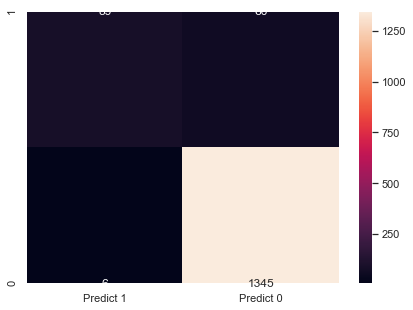

In [279]:
# calculate accuracy measures and confusion matrix
print("Confusion Matrix")
cm=metrics.confusion_matrix(Y_test, predicted_labels, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g')
print(cm)

In [280]:
# 89 times the model predicted correctly that person is going to take loan

In [281]:
# 1345 times the model predicted correctly that person is not going to take loan

In [282]:
# 60 times the model predicted incorrectly that person is going to take loan

In [283]:
# 6 times the model predicted incorrectly that person is not going to take loan

In [284]:
TP = 89
TN = 1345
FP = 6
FN = 60
#Accuracy 
accuracy = (TP+TN)/(TP+TN+FP+FN)
print('accuracy : ', accuracy)
#TPR
TPR = (TP)/(TP+FN)
print('TPR :', TPR)
#FPR
FPR = TN/(TN+FP)
print('FPR :', FPR)

accuracy :  0.956
TPR : 0.5973154362416108
FPR : 0.9955588452997779


In [285]:
#Naive bayes Model

In [286]:
# Create a separate dataframe consisting only of the features i.e independent attributes

X = banking.drop(labels= "Personal Loan" , axis = 1)
Y = banking["Personal Loan"]
X.head()

,Age,Experience,Income,Family,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,Education_ Advanced/Professional,Education_Graduate,Education_Undergrad
0,25,1,49,4,1.6,0,1,0,0,0,0,0,1
1,45,19,34,3,1.5,0,1,0,0,0,0,0,1
2,39,15,11,1,1.0,0,0,0,0,0,0,0,1
3,35,9,100,1,2.7,0,0,0,0,0,0,1,0
4,35,8,45,4,1.0,0,0,0,0,1,0,1,0


In [287]:
# Split X and y into training and test set in 70:30 ratio

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [288]:
# creatw the model
loan_model = GaussianNB()

loan_model.fit(X_train, Y_train.ravel())

GaussianNB(priors=None, var_smoothing=1e-09)

In [289]:
load_predict = loan_model.predict(X_train)


print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(Y_train, load_predict)))
print()

Model Accuracy: 0.8969



In [290]:
#Model performance with training data: 90% correct

In [291]:
load_test_predict = loan_model.predict(X_test)


print("Model Accuracy For Test : {0:.4f}".format(metrics.accuracy_score(Y_test, load_test_predict)))
print()

Model Accuracy For Test : 0.8867



In [292]:
#Model performance with training data: 89% correct

Confusion Matrix
[[  87   62]
 [ 108 1243]]


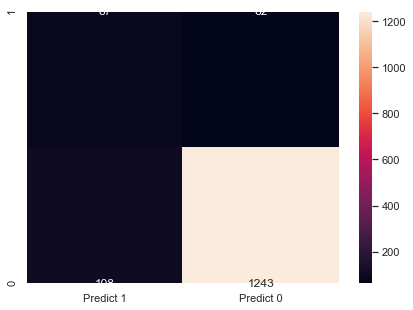

In [293]:
print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, load_test_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g')
print(cm)

In [294]:
# 87 times the model predicted correctly that person is going to take loan

In [295]:
# 1243 times the model predicted correctly that person is not going to take loan

In [296]:
# 62 times the model predicted incorrectly that person is going to take loan

In [297]:
# 108 times the model predicted incorrectly that person is not going to take loan

In [298]:
# Going through the above models it looks like Logistic Regression Model is the best model since it predicted correctly 95.7% of the time

In [299]:
TP = 86
TN = 1252
FP = 63
FN = 90
#Accuracy 
accuracy = (TP+TN)/(TP+TN+FP+FN)
print('accuracy : ', accuracy)
#TPR
TPR = (TP)/(TP+FN)
print('TPR :', TPR)
#FPR
FPR = TN/(TN+FP)
print('FPR :', FPR)

accuracy :  0.89738430583501
TPR : 0.48863636363636365
FPR : 0.9520912547528517
